In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('../../../Data/cifar10/')
data = (ImageList.from_folder(path)
                .split_none()
                .label_from_folder()
                .databunch(bs=64, num_workers=8, device=torch.device('cuda')).normalize(([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])))

In [22]:
model = models.resnet18()
loss_fn = nn.CrossEntropyLoss()
# optim = torch.optim.Adam(model.parameters(), lr=0.001)

learn = Learner(data, model, opt_func=partial(optim.Adam, betas=(0.9, 0.99)), loss_func=loss_fn, wd=0)

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


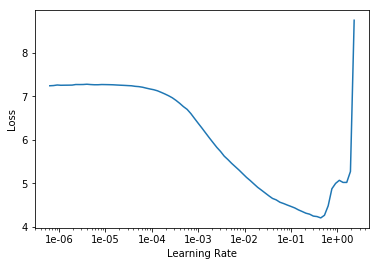

In [24]:
learn.recorder.plot()